In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-12-16 20:31:20.781402: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-12-16 20:31:41.445803: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-16 20:31:41.782317: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-16 20:31:41.782936: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-12-16 20:31:41.783003: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [3]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [5]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [6]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [7]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Training

In [8]:
# Hyperparamers to be used in all models
base_learning_rate = 0.001
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 200


# Callback Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=20,
                                                mode="min",
                                               restore_best_weights=True)


# Custom CNN model

Training with Data Augmentation

Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 32s 26ms/step - loss: 0.3247 - accuracy: 0.8481 - val_loss: 0.2835 - val_accuracy: 0.8448


2022-11-29 06:25:57.393760: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: .model_a/assets
Epoch 2/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2590 - accuracy: 0.8849 - val_loss: 0.2940 - val_accuracy: 0.8823
Epoch 3/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2350 - accuracy: 0.9002 - val_loss: 0.2370 - val_accuracy: 0.8953
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 4/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2174 - accuracy: 0.9104 - val_loss: 0.2128 - val_accuracy: 0.9194
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 5/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2074 - accuracy: 0.9148 - val_loss: 0.2186 - val_accuracy: 0.9223
Epoch 6/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2007 - accuracy: 0.9187 - val_loss: 0.1996 - val_accuracy: 0.9312
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 7/200
1200/1200 [==============================] - 29s 

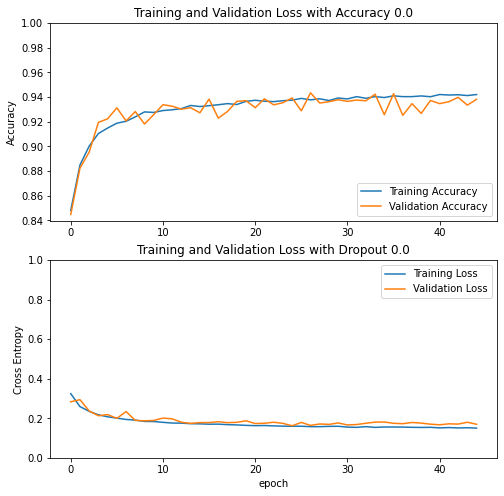

258/258 [==============================] - 3s 12ms/step - loss: 0.1574 - accuracy: 0.9392
Test accuracy : 0.9392244815826416


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.007s...
[t-SNE] Computed neighbors for 8227 samples in 2.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 3.110095
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.054970
[t-SNE] KL divergence after 2500 iterations: 2.064604


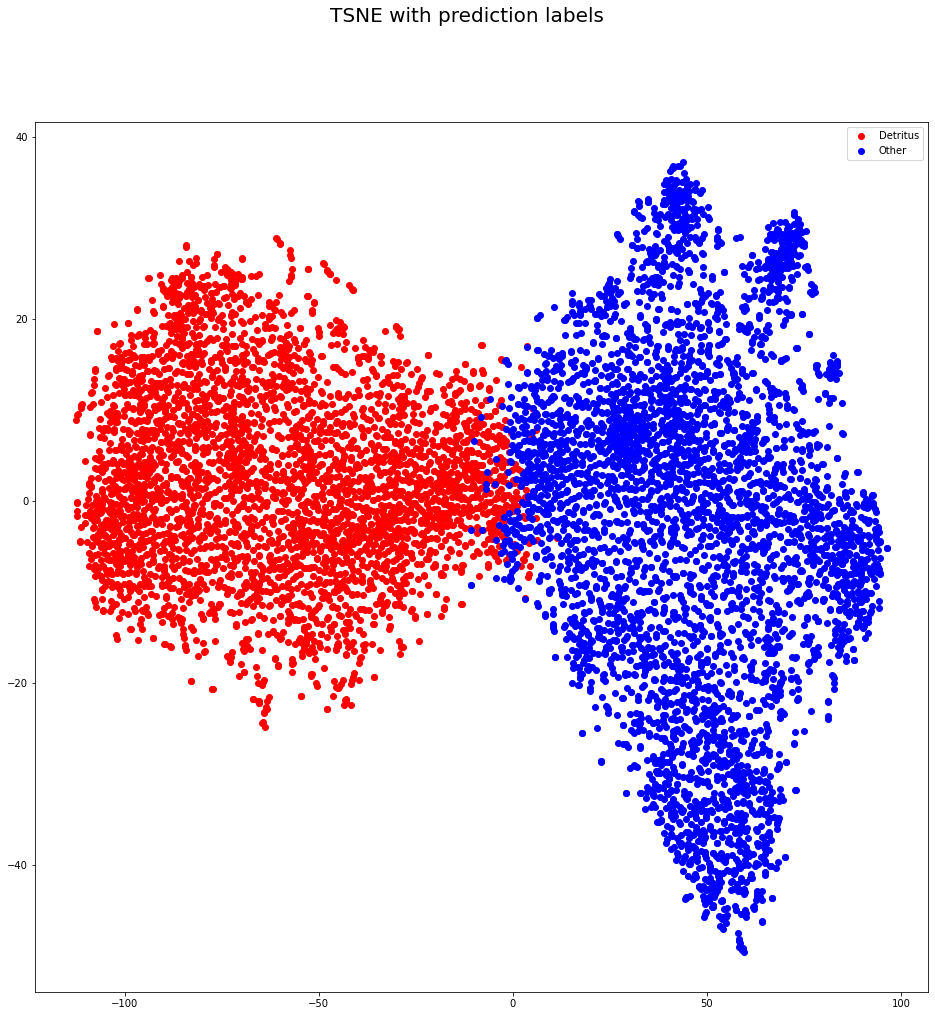

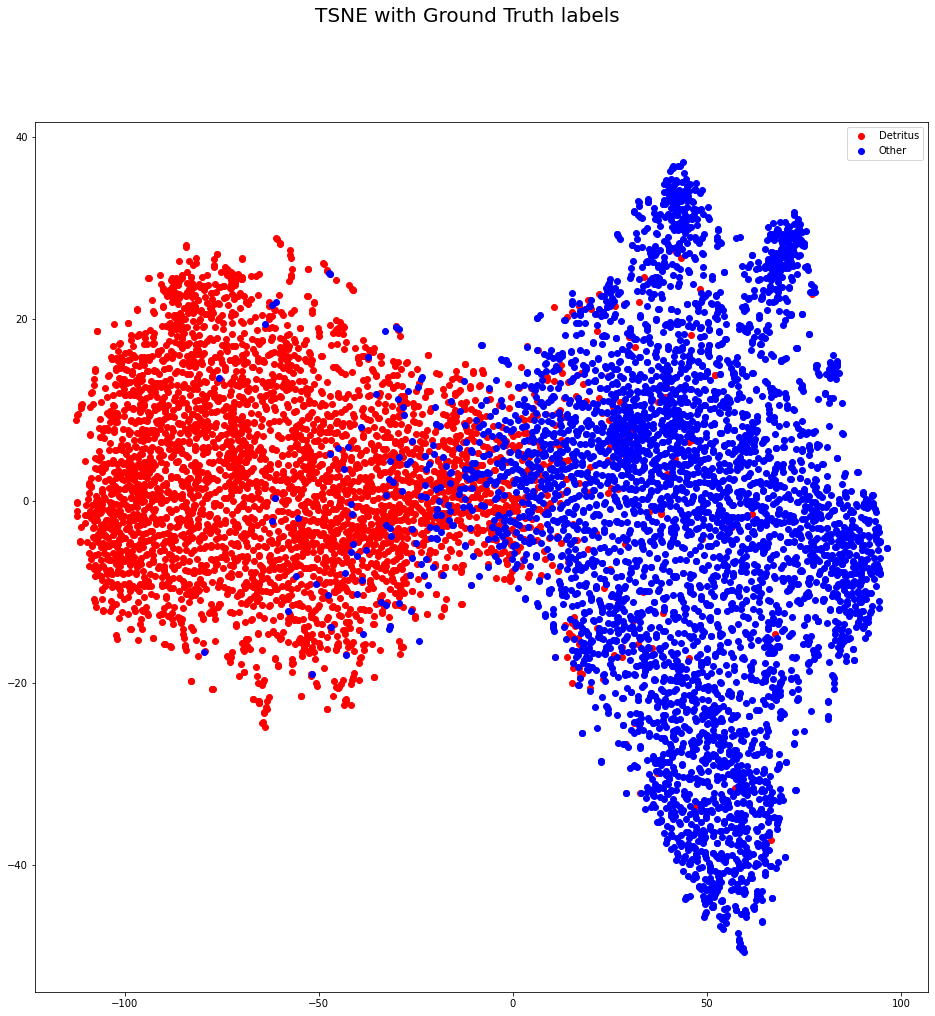

In [9]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_a', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

model_A = get_model_A(0.0, True, 0.0)
history = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)


Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 30s 24ms/step - loss: 0.3456 - accuracy: 0.8361 - val_loss: 0.3004 - val_accuracy: 0.8826
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 2/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2601 - accuracy: 0.8841 - val_loss: 0.2605 - val_accuracy: 0.8714
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 3/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2391 - accuracy: 0.8977 - val_loss: 0.2285 - val_accuracy: 0.8925
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 4/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2211 - accuracy: 0.9071 - val_loss: 0.2375 - val_accuracy: 0.9081
Epoch 5/200
1200/1200 [==============================] - 29s 24ms/step - loss: 0.2105 - accuracy: 0.9129 - val_loss: 0.2226 - val_accuracy: 0.9040
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 6/200
1200/1200 [=========

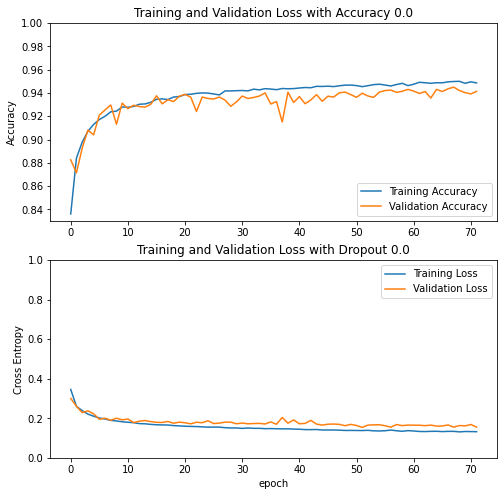

258/258 [==============================] - 3s 11ms/step - loss: 0.1408 - accuracy: 0.9435
Test accuracy : 0.9434787631034851


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.001s...
[t-SNE] Computed neighbors for 8227 samples in 2.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 2.244415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.981377
[t-SNE] KL divergence after 2500 iterations: 1.740249


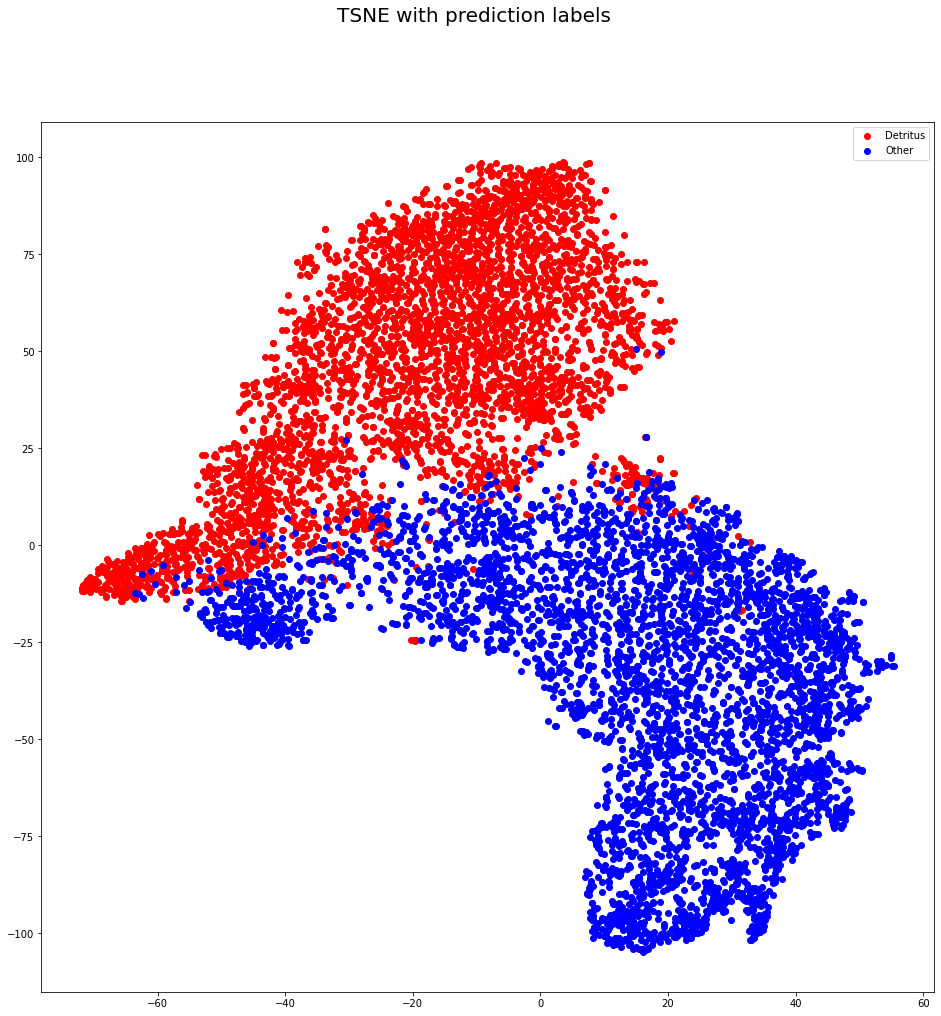

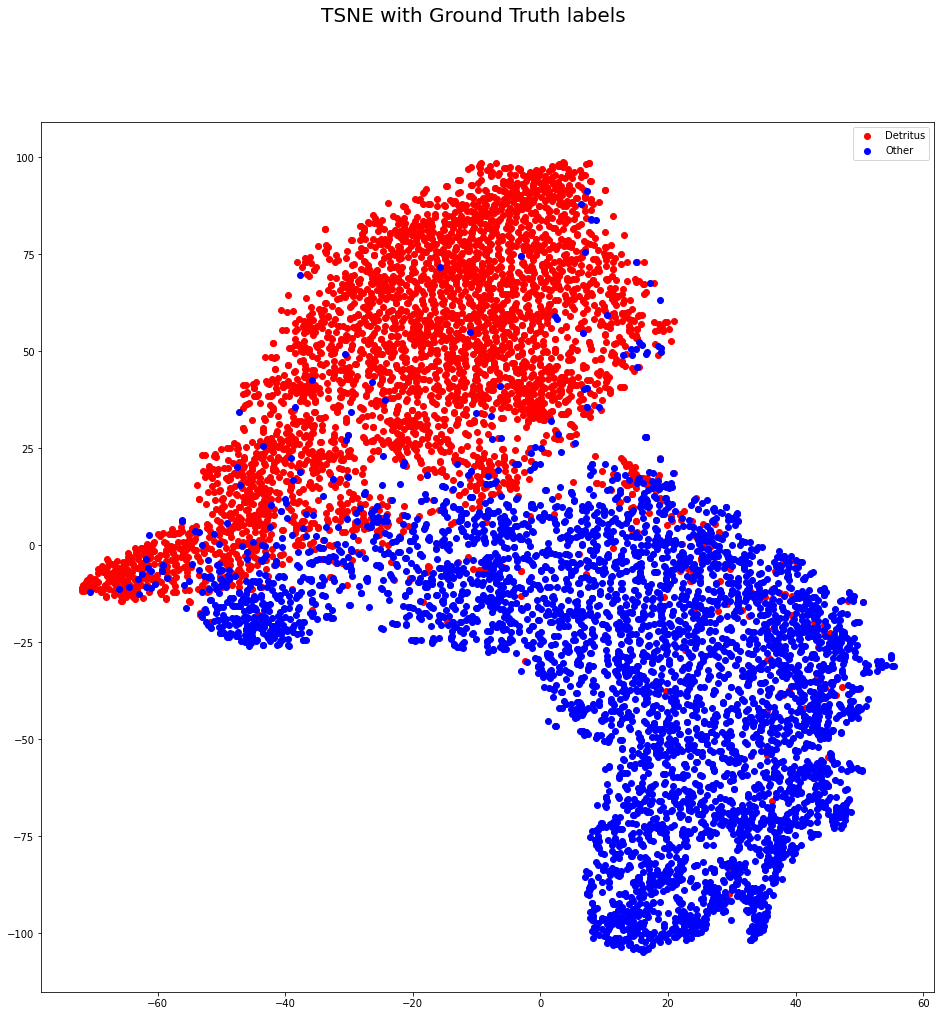

In [10]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_b', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

model_B = get_model_B(0.0, True, 0.0)
history = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


In [11]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

# MobileNetV2 Model From Scratch

Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 190s 155ms/step - loss: 0.3862 - accuracy: 0.8240 - val_loss: 0.8945 - val_accuracy: 0.4639


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 2/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.3376 - accuracy: 0.8453 - val_loss: 1.2949 - val_accuracy: 0.4639
Epoch 3/200
1200/1200 [==============================] - 183s 153ms/step - loss: 0.3052 - accuracy: 0.8609 - val_loss: 1.3761 - val_accuracy: 0.4639
Epoch 4/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.2740 - accuracy: 0.8780 - val_loss: 1.6102 - val_accuracy: 0.4639
Epoch 5/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.2389 - accuracy: 0.8966 - val_loss: 2.2312 - val_accuracy: 0.4644
Epoch 6/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.2190 - accuracy: 0.9071 - val_loss: 0.3497 - val_accuracy: 0.8530


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 7/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.2098 - accuracy: 0.9127 - val_loss: 0.2750 - val_accuracy: 0.8942


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 8/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1996 - accuracy: 0.9187 - val_loss: 0.2136 - val_accuracy: 0.9187


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 9/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.1898 - accuracy: 0.9218 - val_loss: 0.6881 - val_accuracy: 0.7843
Epoch 10/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1820 - accuracy: 0.9260 - val_loss: 0.3032 - val_accuracy: 0.8982
Epoch 11/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.1778 - accuracy: 0.9281 - val_loss: 0.2228 - val_accuracy: 0.9267
Epoch 12/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.1716 - accuracy: 0.9312 - val_loss: 0.2211 - val_accuracy: 0.9162
Epoch 13/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1676 - accuracy: 0.9325 - val_loss: 0.9247 - val_accuracy: 0.7137
Epoch 14/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.1642 - accuracy: 0.9330 - val_loss: 0.2571 - val_accuracy: 0.9161
Epoch 15/200
1200/1200 [===============

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 19/200
1200/1200 [==============================] - 183s 152ms/step - loss: 0.1506 - accuracy: 0.9407 - val_loss: 0.1737 - val_accuracy: 0.9413
Epoch 20/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1453 - accuracy: 0.9427 - val_loss: 0.1706 - val_accuracy: 0.9391
Epoch 21/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1453 - accuracy: 0.9428 - val_loss: 0.1790 - val_accuracy: 0.9361
Epoch 22/200
1200/1200 [==============================] - 182s 151ms/step - loss: 0.1421 - accuracy: 0.9445 - val_loss: 0.2009 - val_accuracy: 0.9340
Epoch 23/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.1428 - accuracy: 0.9430 - val_loss: 0.1942 - val_accuracy: 0.9294
Epoch 24/200
1200/1200 [==============================] - 182s 152ms/step - loss: 0.1401 - accuracy: 0.9449 - val_loss: 0.1942 - val_accuracy: 0.9362
Epoch 25/200
1200/1200 [==============

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 27/200
1200/1200 [==============================] - 182s 151ms/step - loss: 0.1346 - accuracy: 0.9483 - val_loss: 0.4133 - val_accuracy: 0.8566
Epoch 28/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.1330 - accuracy: 0.9485 - val_loss: 0.1472 - val_accuracy: 0.9440


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 29/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.1308 - accuracy: 0.9497 - val_loss: 0.1804 - val_accuracy: 0.9413
Epoch 30/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1307 - accuracy: 0.9492 - val_loss: 0.1485 - val_accuracy: 0.9449
Epoch 31/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1266 - accuracy: 0.9508 - val_loss: 0.1597 - val_accuracy: 0.9431
Epoch 32/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1281 - accuracy: 0.9494 - val_loss: 0.1511 - val_accuracy: 0.9460
Epoch 33/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.1280 - accuracy: 0.9500 - val_loss: 0.1538 - val_accuracy: 0.9412
Epoch 34/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1268 - accuracy: 0.9517 - val_loss: 0.1825 - val_accuracy: 0.9379
Epoch 35/200
1200/1200 [==============

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 45/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1154 - accuracy: 0.9566 - val_loss: 0.1568 - val_accuracy: 0.9472
Epoch 46/200
1200/1200 [==============================] - 183s 153ms/step - loss: 0.1131 - accuracy: 0.9564 - val_loss: 0.1532 - val_accuracy: 0.9455
Epoch 47/200
1200/1200 [==============================] - 183s 153ms/step - loss: 0.1134 - accuracy: 0.9563 - val_loss: 0.1723 - val_accuracy: 0.9413
Epoch 48/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1114 - accuracy: 0.9576 - val_loss: 0.1366 - val_accuracy: 0.9511


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 49/200
1200/1200 [==============================] - 186s 155ms/step - loss: 0.1142 - accuracy: 0.9563 - val_loss: 0.1661 - val_accuracy: 0.9403
Epoch 50/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.1122 - accuracy: 0.9580 - val_loss: 0.1463 - val_accuracy: 0.9427
Epoch 51/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1137 - accuracy: 0.9561 - val_loss: 0.1608 - val_accuracy: 0.9413
Epoch 52/200
1200/1200 [==============================] - 182s 151ms/step - loss: 0.1112 - accuracy: 0.9575 - val_loss: 0.1740 - val_accuracy: 0.9390
Epoch 53/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1103 - accuracy: 0.9572 - val_loss: 0.2811 - val_accuracy: 0.9137
Epoch 54/200
1200/1200 [==============================] - 185s 154ms/step - loss: 0.1095 - accuracy: 0.9574 - val_loss: 0.1483 - val_accuracy: 0.9440
Epoch 55/200
1200/1200 [==============

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 57/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1067 - accuracy: 0.9583 - val_loss: 0.1430 - val_accuracy: 0.9520
Epoch 58/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1079 - accuracy: 0.9573 - val_loss: 0.1364 - val_accuracy: 0.9554
Epoch 59/200
1200/1200 [==============================] - 183s 153ms/step - loss: 0.1060 - accuracy: 0.9599 - val_loss: 0.1369 - val_accuracy: 0.9505
Epoch 60/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1066 - accuracy: 0.9582 - val_loss: 0.1436 - val_accuracy: 0.9509
Epoch 61/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.1055 - accuracy: 0.9591 - val_loss: 0.1411 - val_accuracy: 0.9493
Epoch 62/200
1200/1200 [==============================] - 182s 152ms/step - loss: 0.1032 - accuracy: 0.9601 - val_loss: 0.1437 - val_accuracy: 0.9436
Epoch 63/200
1200/1200 [==============

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 75/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.0989 - accuracy: 0.9619 - val_loss: 0.1338 - val_accuracy: 0.9504
Epoch 76/200
1200/1200 [==============================] - 186s 155ms/step - loss: 0.0975 - accuracy: 0.9622 - val_loss: 0.1364 - val_accuracy: 0.9515
Epoch 77/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.0970 - accuracy: 0.9627 - val_loss: 0.1281 - val_accuracy: 0.9554


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 78/200
1200/1200 [==============================] - 184s 154ms/step - loss: 0.0958 - accuracy: 0.9625 - val_loss: 0.1487 - val_accuracy: 0.9447
Epoch 79/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.0945 - accuracy: 0.9636 - val_loss: 0.1376 - val_accuracy: 0.9482
Epoch 80/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.0938 - accuracy: 0.9638 - val_loss: 0.1439 - val_accuracy: 0.9470
Epoch 81/200
1200/1200 [==============================] - 181s 151ms/step - loss: 0.0940 - accuracy: 0.9631 - val_loss: 0.1468 - val_accuracy: 0.9497
Epoch 82/200
1200/1200 [==============================] - 184s 153ms/step - loss: 0.0943 - accuracy: 0.9633 - val_loss: 0.1627 - val_accuracy: 0.9427
Epoch 83/200
1200/1200 [==============================] - 183s 153ms/step - loss: 0.0932 - accuracy: 0.9645 - val_loss: 0.1454 - val_accuracy: 0.9446
Epoch 84/200
1200/1200 [==============

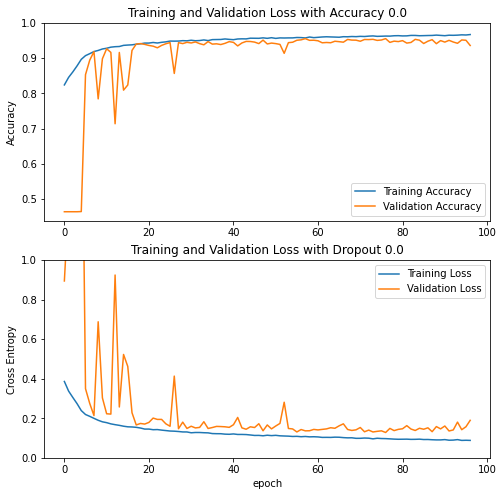

258/258 [==============================] - 8s 29ms/step - loss: 0.1297 - accuracy: 0.9542
Test accuracy : 0.9541752934455872


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.014s...
[t-SNE] Computed neighbors for 8227 samples in 2.803s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.757673
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.818527
[t-SNE] KL divergence after 2500 iterations: 1.326304


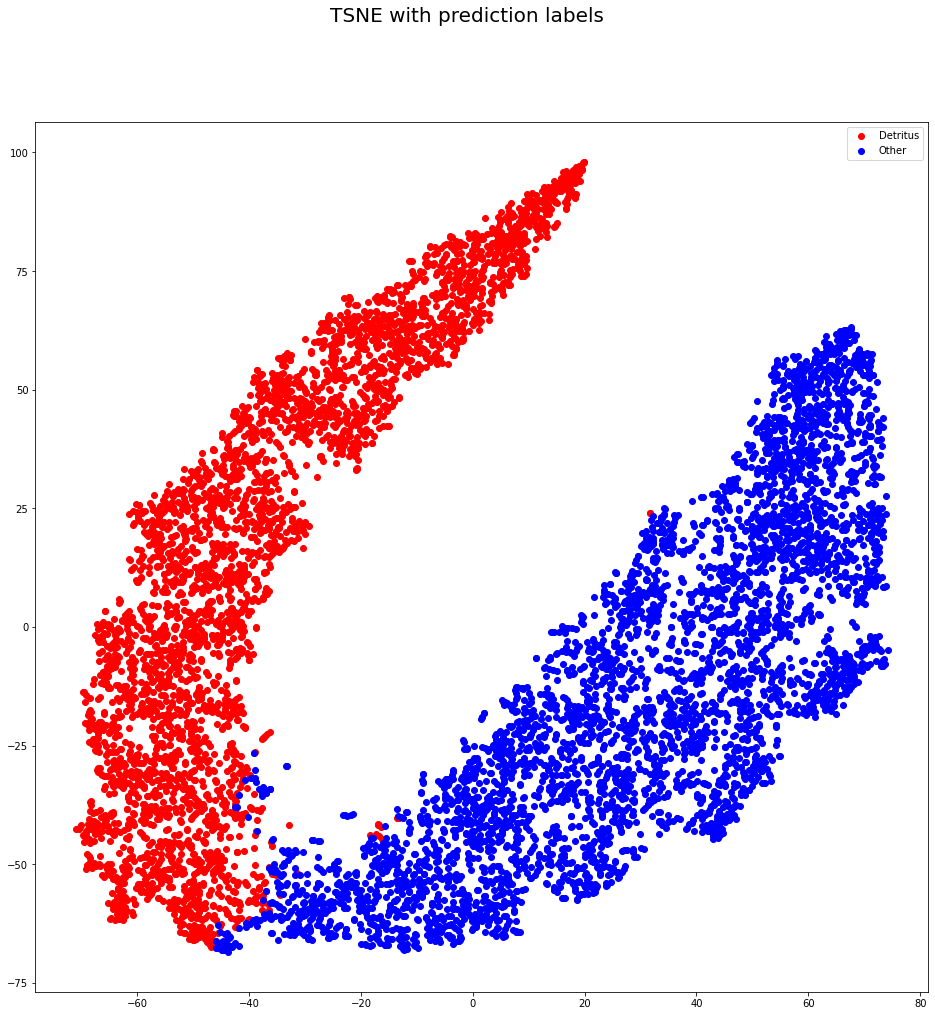

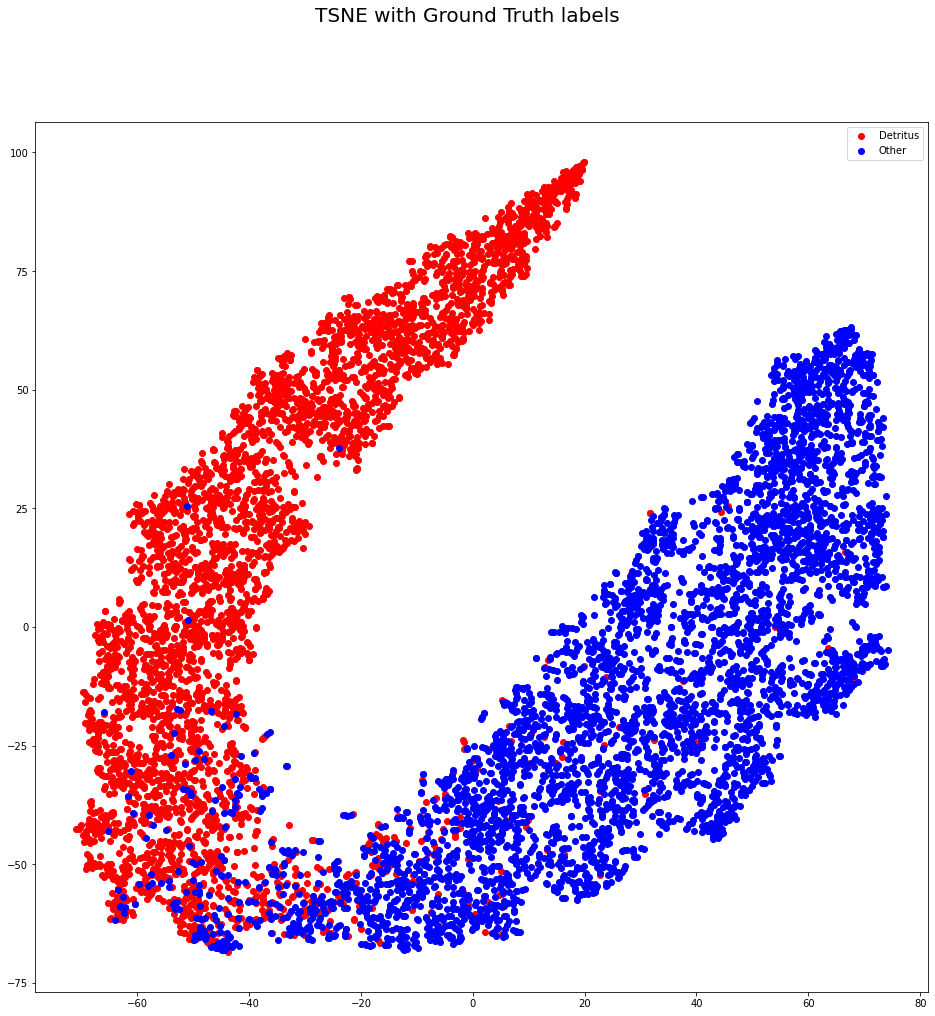

In [12]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

base_learning_rate = 0.0001
mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
history = train_model(mobileNetModelSc, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

# DenseNet model

In [9]:
def show_plot(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [10]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.dense_net_ft', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0, input_model=None, base_model=None):
    dense_model = input_model
    dense_base_model = base_model
    if (input_model is None):
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

        dense_base_model.trainable = False

        dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
        dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        dense_prediction_layer = tf.keras.layers.Dense(1)

        dense_inputs = tf.keras.Input(shape=(160, 160, 3))
        if data_aug:
            dag = data_augmentation(dense_inputs)
            dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
        else:
            dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
        dense_x = dense_base_model(dense_x, training=False)
        dense_x = dense_global_average_layer(dense_x)
        if drop_value > 0:
            dense_x = keras.layers.Dropout(drop_value)(dense_x)
        dense_outputs = dense_prediction_layer(dense_x)
        dense_model = tf.keras.Model(dense_inputs, dense_outputs)

    dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    dense_history = dense_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = dense_history.history['accuracy']
    val_acc = dense_history.history['val_accuracy']

    loss = dense_history.history['loss']
    val_loss = dense_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    dense_base_model.trainable = True
    
    dense_fine_tune_at = 660
    
    for layer in dense_base_model.layers[:dense_fine_tune_at]:
        layer.trainable =  False
        
    dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    dense_history_fine = dense_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=dense_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += dense_history_fine.history['accuracy']
    val_acc += dense_history_fine.history['val_accuracy']

    loss += dense_history_fine.history['loss']
    val_loss += dense_history_fine.history['val_loss']
    
    show_plot(acc, val_acc, loss, val_loss)
    
    loss, accuracy = dense_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    
    print_tsne(dense_model, test_dataset, 2500)

In [11]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

In [17]:
TRAINING_EPOCHS=100

Epoch 1/100
1200/1200 [==============================] - 102s 77ms/step - loss: 0.2237 - accuracy: 0.9061 - val_loss: 0.1928 - val_accuracy: 0.9170
Epoch 2/100
1200/1200 [==============================] - 90s 75ms/step - loss: 0.1925 - accuracy: 0.9227 - val_loss: 0.1851 - val_accuracy: 0.9246
Epoch 3/100
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1875 - accuracy: 0.9237 - val_loss: 0.1883 - val_accuracy: 0.9162
Epoch 4/100
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1831 - accuracy: 0.9265 - val_loss: 0.1814 - val_accuracy: 0.9302
Epoch 5/100
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1804 - accuracy: 0.9284 - val_loss: 0.1789 - val_accuracy: 0.9243
Epoch 6/100
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1786 - accuracy: 0.9287 - val_loss: 0.1790 - val_accuracy: 0.9294
Epoch 7/100
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1797 - accuracy: 0.9276 - val_loss: 

1200/1200 [==============================] - 88s 74ms/step - loss: 0.1747 - accuracy: 0.9300 - val_loss: 0.1758 - val_accuracy: 0.9339
Epoch 57/100
1200/1200 [==============================] - 88s 74ms/step - loss: 0.1752 - accuracy: 0.9291 - val_loss: 0.1752 - val_accuracy: 0.9248
Epoch 58/100
1200/1200 [==============================] - 88s 73ms/step - loss: 0.1735 - accuracy: 0.9315 - val_loss: 0.1755 - val_accuracy: 0.9280
Epoch 59/100
1200/1200 [==============================] - 88s 73ms/step - loss: 0.1751 - accuracy: 0.9292 - val_loss: 0.1797 - val_accuracy: 0.9346
Epoch 60/100
1200/1200 [==============================] - 88s 73ms/step - loss: 0.1726 - accuracy: 0.9306 - val_loss: 0.1829 - val_accuracy: 0.9341
Epoch 61/100
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1741 - accuracy: 0.9298 - val_loss: 0.1758 - val_accuracy: 0.9352
Epoch 62/100
1200/1200 [==============================] - 88s 73ms/step - loss: 0.1741 - accuracy: 0.9304 - val_loss: 0.1731 

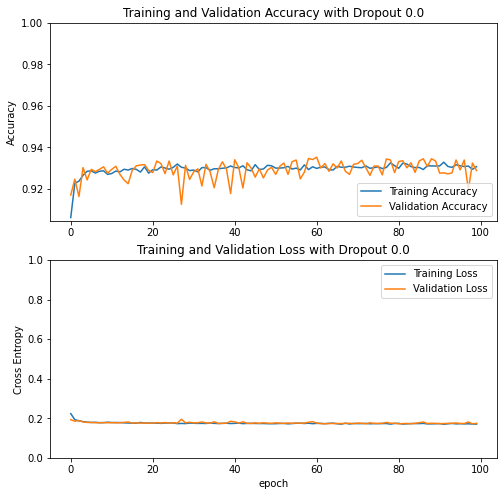

Epoch 100/200
1200/1200 [==============================] - 121s 90ms/step - loss: 0.1798 - accuracy: 0.9312 - val_loss: 0.1795 - val_accuracy: 0.9257
Epoch 101/200
1200/1200 [==============================] - 105s 88ms/step - loss: 0.1699 - accuracy: 0.9369 - val_loss: 0.1779 - val_accuracy: 0.9412
Epoch 102/200
1200/1200 [==============================] - 105s 88ms/step - loss: 0.1668 - accuracy: 0.9383 - val_loss: 0.1784 - val_accuracy: 0.9244
Epoch 103/200
1200/1200 [==============================] - 105s 87ms/step - loss: 0.1615 - accuracy: 0.9416 - val_loss: 0.1870 - val_accuracy: 0.9430
Epoch 104/200
1200/1200 [==============================] - 105s 88ms/step - loss: 0.1640 - accuracy: 0.9418 - val_loss: 0.1886 - val_accuracy: 0.9448
Epoch 105/200
1200/1200 [==============================] - 105s 88ms/step - loss: 0.1627 - accuracy: 0.9417 - val_loss: 0.1779 - val_accuracy: 0.9373
Epoch 106/200
1200/1200 [==============================] - 105s 88ms/step - loss: 0.1624 - accuracy:

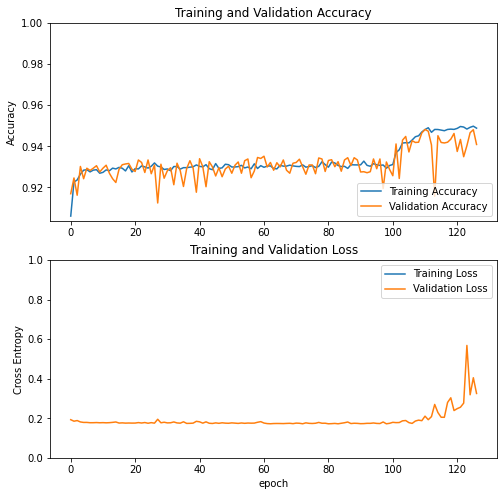

/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.018s...
[t-SNE] Computed neighbors for 8227 samples in 2.697s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 6.125928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.741821
[t-SNE] KL divergence after 2500 iterations: 2.016798


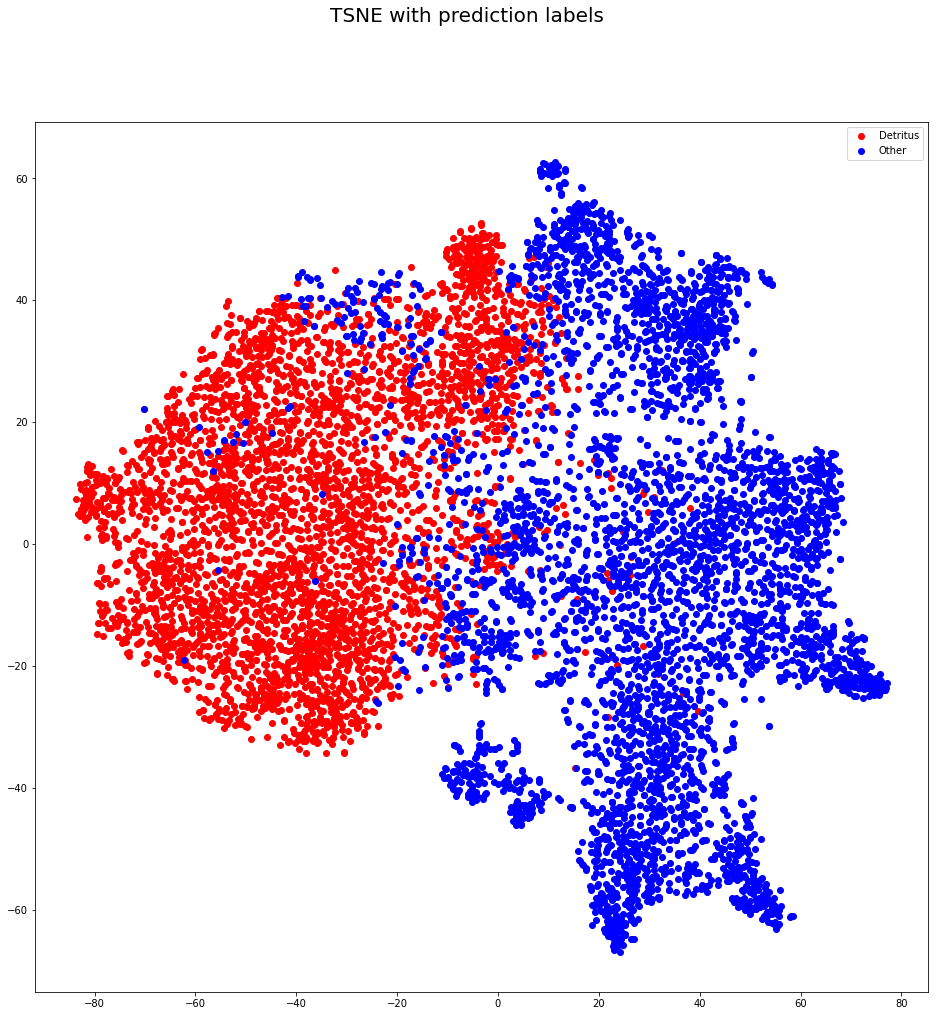

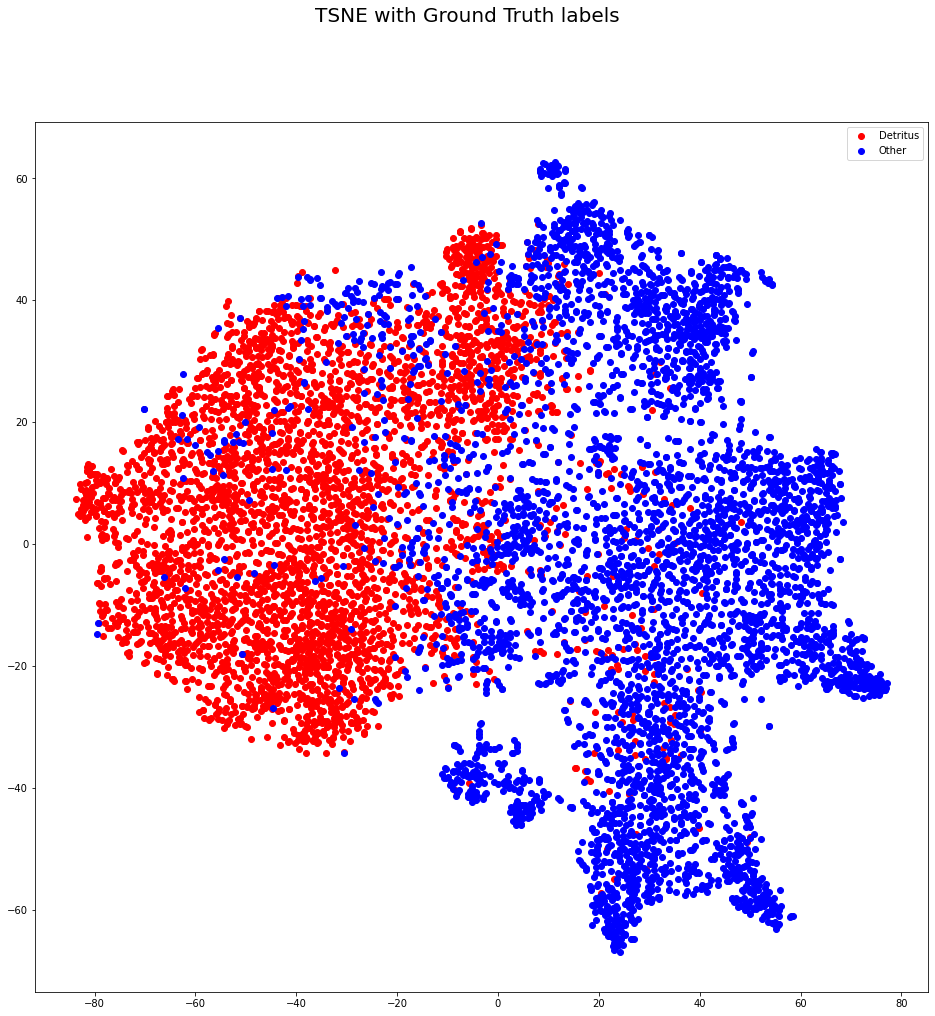

In [18]:
base_dense_model, denseNetModel = get_dense_net(0.0, True, 0.0)
do_transfer_learning(0.0, True, 0.0)

In [19]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
          
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

# Inception Resnet V2 Fine Tuning 

In [22]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.inception_resnet_v2', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

    inception_resnet_base_model.trainable = False

    ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
    ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    ir_prediction_layer = tf.keras.layers.Dense(1)

    ir_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(ir_inputs)
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)
    else:
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(ir_inputs)
    ir_x = inception_resnet_base_model(ir_x, training=False)
    ir_x = ir_global_average_layer(ir_x)
    if drop_value > 0:
        ir_x = keras.layers.Dropout(drop_value)(ir_x)
    ir_outputs = ir_prediction_layer(ir_x)
    ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
    ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    ir_history = ir_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = ir_history.history['accuracy']
    val_acc = ir_history.history['val_accuracy']

    loss = ir_history.history['loss']
    val_loss = ir_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    inception_resnet_base_model.trainable = True
    
    ir_fine_tune_at = 755
    
    for layer in inception_resnet_base_model.layers[:ir_fine_tune_at]:
        layer.trainable =  False
        
    ir_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    ir_history_fine = ir_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=ir_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += ir_history_fine.history['accuracy']
    val_acc += ir_history_fine.history['val_accuracy']

    loss += ir_history_fine.history['loss']
    val_loss += ir_history_fine.history['val_loss']
    
    show_plot(acc, val_acc, loss, val_loss)
    
    loss, accuracy = ir_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    print_tsne(ir_model, test_dataset, 2500)
    

Epoch 1/100
1200/1200 [==============================] - 119s 92ms/step - loss: 0.2317 - accuracy: 0.9038 - val_loss: 0.1971 - val_accuracy: 0.9217
INFO:tensorflow:Assets written to: .inception_resnet_v2/assets
Epoch 2/100
1200/1200 [==============================] - 106s 88ms/step - loss: 0.1995 - accuracy: 0.9205 - val_loss: 0.1939 - val_accuracy: 0.9295
INFO:tensorflow:Assets written to: .inception_resnet_v2/assets
Epoch 3/100
1200/1200 [==============================] - 104s 86ms/step - loss: 0.1962 - accuracy: 0.9210 - val_loss: 0.1864 - val_accuracy: 0.9222
INFO:tensorflow:Assets written to: .inception_resnet_v2/assets
Epoch 4/100
1200/1200 [==============================] - 102s 85ms/step - loss: 0.1876 - accuracy: 0.9252 - val_loss: 0.1918 - val_accuracy: 0.9149
Epoch 5/100
1200/1200 [==============================] - 103s 86ms/step - loss: 0.1845 - accuracy: 0.9259 - val_loss: 0.1781 - val_accuracy: 0.9284
INFO:tensorflow:Assets written to: .inception_resnet_v2/assets
Epoch 6/

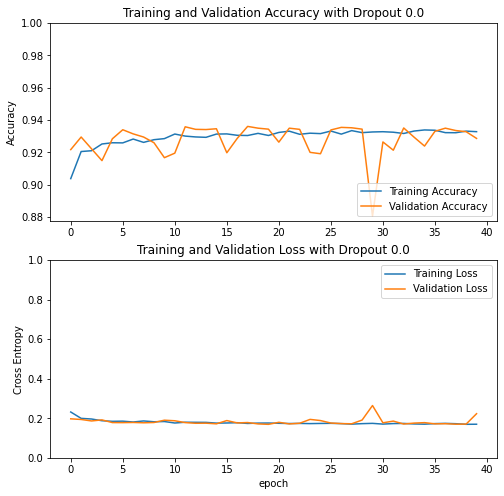

Epoch 40/200
1200/1200 [==============================] - 124s 95ms/step - loss: 0.2191 - accuracy: 0.9234 - val_loss: 0.1937 - val_accuracy: 0.9358
Epoch 41/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1844 - accuracy: 0.9330 - val_loss: 0.1824 - val_accuracy: 0.9370
Epoch 42/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1850 - accuracy: 0.9343 - val_loss: 0.1804 - val_accuracy: 0.9382
Epoch 43/200
1200/1200 [==============================] - 110s 92ms/step - loss: 0.1883 - accuracy: 0.9346 - val_loss: 0.1732 - val_accuracy: 0.9249
Epoch 44/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.1981 - accuracy: 0.9339 - val_loss: 0.1930 - val_accuracy: 0.9409
Epoch 45/200
1200/1200 [==============================] - 111s 92ms/step - loss: 0.2129 - accuracy: 0.9336 - val_loss: 0.1935 - val_accuracy: 0.9402
Epoch 46/200
1200/1200 [==============================] - 111s 93ms/step - loss: 0.2142 - accuracy: 0.9311

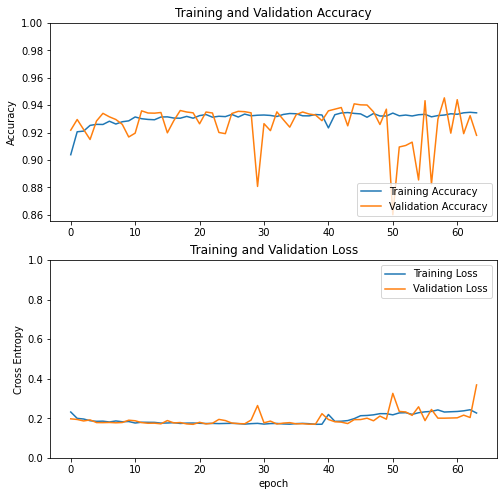

258/258 [==============================] - 18s 71ms/step - loss: 0.1703 - accuracy: 0.9276
Test accuracy : 0.9275556206703186


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.015s...
[t-SNE] Computed neighbors for 8227 samples in 2.624s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 1.619237
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.657341
[t-SNE] KL divergence after 2500 iterations: 1.468580


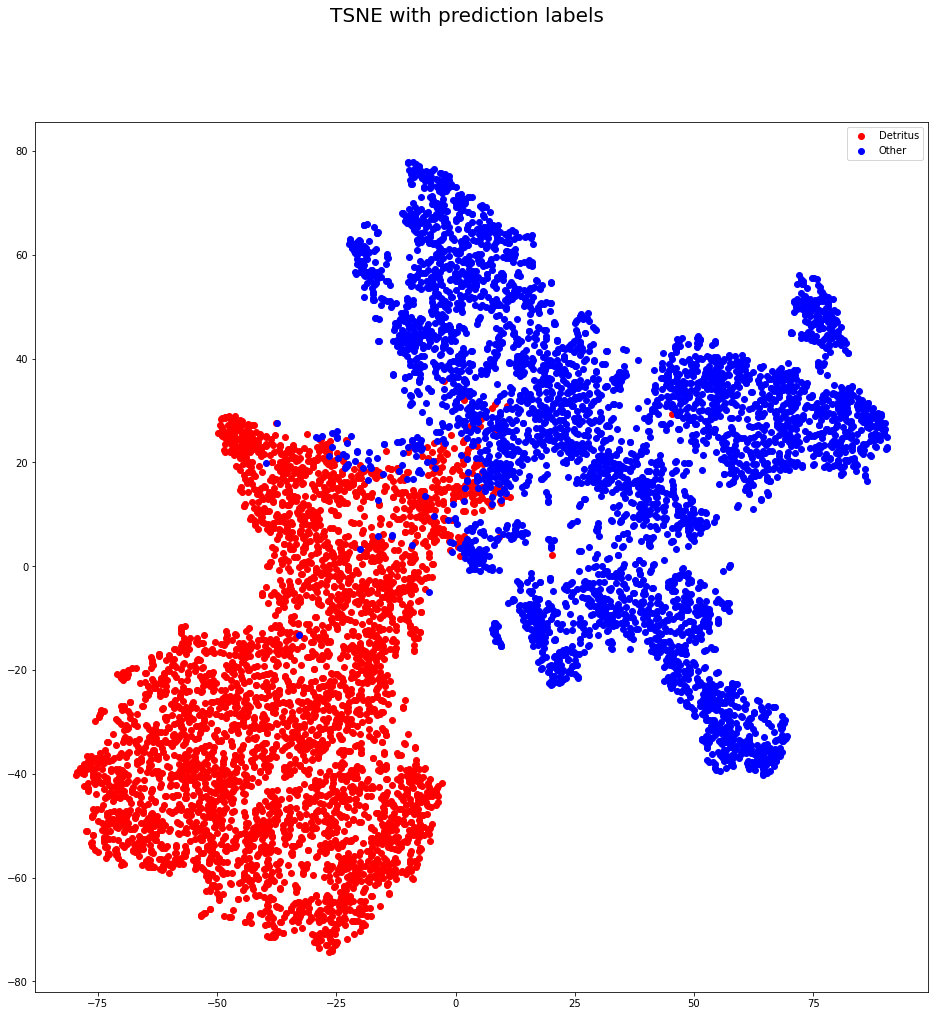

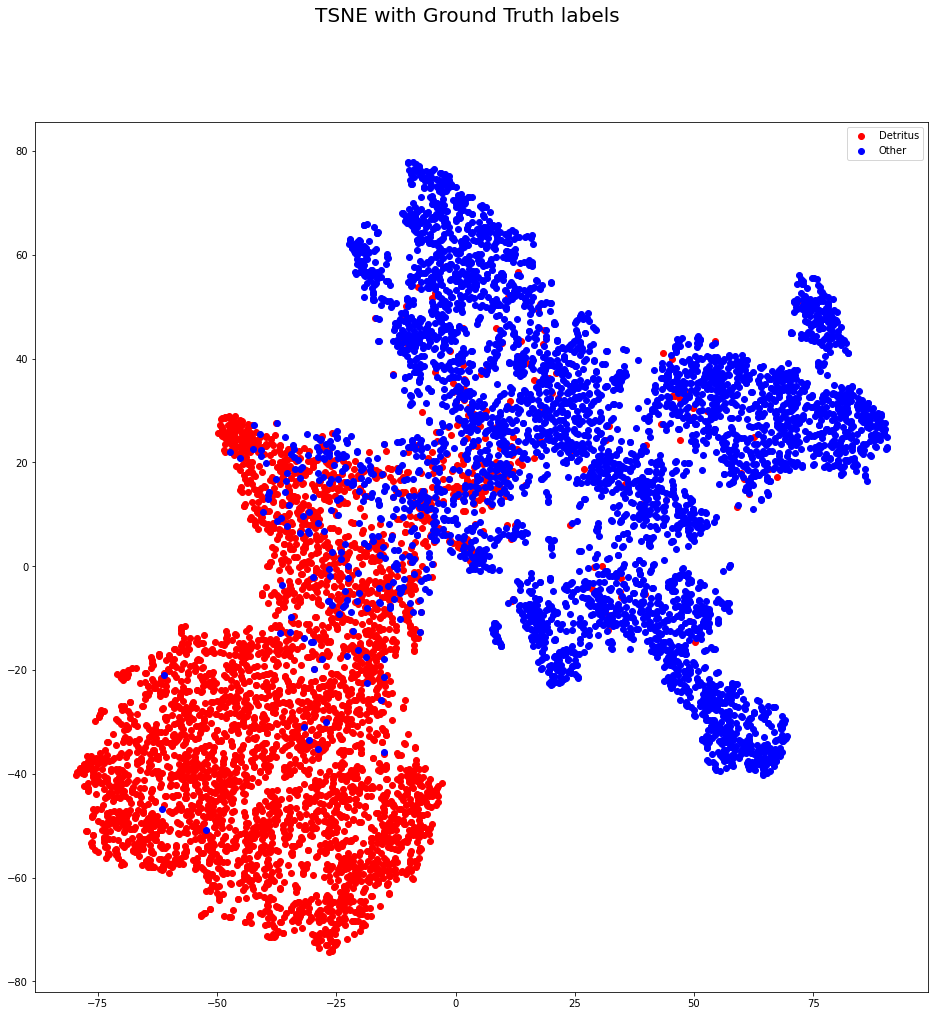

In [23]:
do_transfer_learning(0.0, True, 0.0)